In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
%run ./main.py

# Started at Mon, 08 Jun 2020 06:08:09 +0900 JST
# ===========================
# Python version:  3.7.0 (default, Jun 28 2018, 13:15:42)  [GCC 7.2.0]
# API version:  1013
# Platform:  linux
# ===========================
# Elapse time for preparation:  0.0011873245239257812  [sec]
# Preparaiton is done
# ===========================
# Ended at Mon, 08 Jun 2020 06:08:09 +0900 JST


In [3]:
who

Atomfield	 Atomfluence	 Atomtime	 Atomvolume	 Hartree	 aB	 ch	 chbar	 ct	 
fpi	 halfepsc	 math	 np	 pi	 print_endtime	 print_footer	 print_header	 print_midtime	 
sol	 sys	 te	 time	 tpi	 ts	 tt	 zI	 


In [21]:
class parameter_class:
    def __init__(self):
        self.NK = 20
        self.a = 10.0
        self.b = None
        self.k = None
        self.mv = -0.5
        self.mc = 0.1
        self.Eg = 0.2
        self.NT = 1000
        self.E0 = 0.01
        self.omegac = 1.55/Hartree

    def Make_kspace(self):
        self.b = tpi/self.a
        self.k = np.linspace(-0.5*self.b, 0.5*self.b, self.NK)


In [27]:
def Make_fields(PC):
    T = 2.0*(tpi/PC.omegac)
    t = np.linspace(0.0, T, PC.NT)
    A = (PC.E0/PC.omegac)*np.sin(PC.omegac*t)
    E = PC.E0*np.cos(PC.omegac*t)
    return t, A, E
def k2ec(PC,k):
    ec = 0.5*k**2/PC.mc + PC.Eg
    return ec
def k2ev(PC,k):
    ev = 0.5*k**2/PC.mv
    return ev
def k2vc(PC,k):
    vc = k/PC.mc
    return vc
def k2vv(PC,k):
    vv = k/PC.mv
    return vv


In [6]:
import matplotlib.pyplot as plt

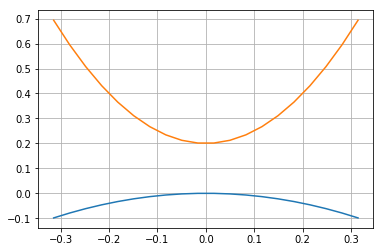

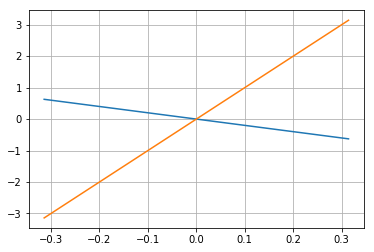

In [29]:
PC = parameter_class()
PC.Make_kspace()
ev = k2ev(PC,PC.k)
ec = k2ec(PC,PC.k)
plt.figure()
plt.plot(PC.k,ev)
plt.plot(PC.k,ec)
plt.grid()
plt.show()
#
vv = k2vv(PC,PC.k)
vc = k2vc(PC,PC.k)
plt.figure()
plt.plot(PC.k,vv)
plt.plot(PC.k,vc)
plt.grid()
plt.show()


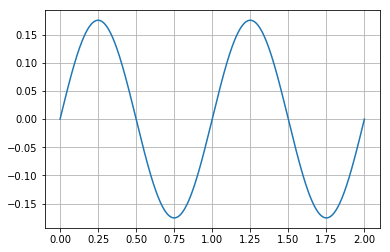

In [35]:
t, A, E= Make_fields(PC)
plt.figure()
plt.plot(t*PC.omegac/tpi,A)
plt.grid()
plt.show()

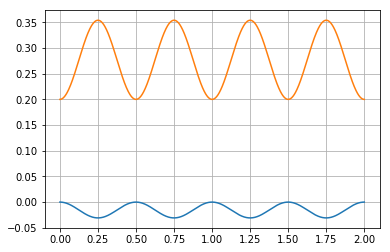

In [36]:
plt.figure()
plt.plot(t*PC.omegac/tpi,k2ev(PC,A))
plt.plot(t*PC.omegac/tpi,k2ec(PC,A))
plt.grid()
plt.show()